# Introduction to Machine Learning and Deep Learning

### Acknowledgements

The content of this notebook was originally created by Nils Eckstein, Julia Buhmann, and Jan Funke for the 2021 DL@MBL course in Woods Hole, and later chopped up and modified by Florian Jug and Igor Zubarev for the 2021 course DL4MIA.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

2022-07-14 14:52:52.459280: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


# Use Keras to Train a (Small) Neural Network

The previous task demonstrated that chosing the weights of a neural network by hand can be quite painful even for simple functions. This will certainly get out of hand once we have more complex networks with several layers and many neurons per layer. But more importantly, the reason why we want to use neural networks to approximate a function is that (in general) we do not know exactly what the function is. We only have data points that describe the function implicitly.

In this task, we will design, train, and evaluate a neural network that can classify points of two different classes on a 2D plane, i.e., the input to our network are the coordinates of points in a plane. Net initial network we want to build should have one hidden layer containing 12 nodes (perceptrons) that receive input from two nodes each, and are themselves connected to one single output node that should predict a binary class for the given input (x,y).

For training this network, we will create a training and a testing dataset. We will then create the network and use stochastic gradient descent to train all network parameters on the training dataset and evaluate its performance on the testing dataset.

## Generate Training Data...

We create both training and testing dataset from the following function (in practice, we would not know this function but have only the data available):

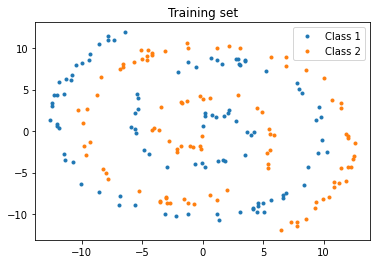

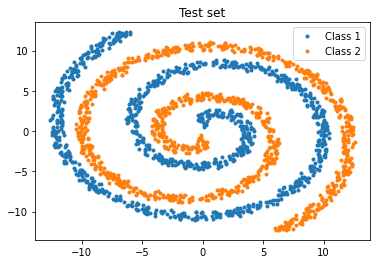

In [2]:
def generate_spiral_data(n_points, noise=1.0):
    n = np.sqrt(np.random.rand(n_points,1)) * 780 * (2*np.pi)/360
    d1x = -np.cos(n)*n + np.random.rand(n_points,1) * noise
    d1y = np.sin(n)*n + np.random.rand(n_points,1) * noise
    return (np.vstack((np.hstack((d1x,d1y)),np.hstack((-d1x,-d1y)))), 
            np.hstack((np.zeros(n_points),np.ones(n_points))))

X_train, y_train = generate_spiral_data(100)

plt.title('Training set')
plt.plot(X_train[y_train==0,0], X_train[y_train==0,1], '.', label='Class 1')
plt.plot(X_train[y_train==1,0], X_train[y_train==1,1], '.', label='Class 2')
plt.legend()
plt.show()

X_test, y_test = generate_spiral_data(1000)

plt.title('Test set')
plt.plot(X_test[y_test==0,0], X_test[y_test==0,1], '.', label='Class 1')
plt.plot(X_test[y_test==1,0], X_test[y_test==1,1], '.', label='Class 2')
plt.legend()
plt.show()

# Let's create and train the network on the generated data...

Please note how incredible short this code is... that's the power of modern neural network libraries...
Try to understand what is roughly going on in the cell below... feel free to use google to figure out what some parts might mean...

In [ ]:
simple_model = Sequential()
simple_model.add(Dense(12, input_dim=2, activation='tanh'))
simple_model.add(Dense(1, activation='sigmoid'))

simple_model.compile(loss='mean_squared_error',
                optimizer='SGD', # SGD = Stochastic Gradient Descent
                metrics=['accuracy'])

# Train the model
# Set verbose parameter to 1 to output the training stats
simple_model.fit(X_train, y_train, epochs=200, batch_size=32,  verbose=0)

# Predict on the testing data
prediction = np.round(simple_model.predict(X_test).T[0])

Now that training is done, let's plot the results...

In [ ]:
def plot_results(pred, model_name):
    plt.subplot(1,2,1)

    plt.title('Test set')
    plt.plot(X_test[y_test==0,0], X_test[y_test==0,1], '.')
    plt.plot(X_test[y_test==1,0], X_test[y_test==1,1], '.')
    plt.subplot(1,2,2)

    plt.title(f'{model_name}_model classification') #TODO change for good model ?
    plt.plot(X_test[pred==0,0], X_test[pred==0,1], '.')
    plt.plot(X_test[pred==1,0], X_test[pred==1,1], '.')
    plt.show()

plot_results(prediction, 'simple_model')

And the result is... **BAD!**

This is, because the network is likely not powerful enough... hence, the model we used is not adequate for the training task at hand.

## Exercise: find a better solution...

Create a second network that is somehow different and performs the task better...

**Hint**: Likely it is a good idea to copy the cell from above and somehow change it in a meaningful way.

In [5]:
###########################################################################
#######                      START OF YOUR CODE                     #######
###########################################################################

# create an alternative model (network) here and train it as we did before...
# currently good_model is the same as the network from above... just to give you a starting point...

good_model = Sequential()
good_model.add(Dense(64, input_dim=2, activation='relu'))
good_model.add(Dense(64, activation='relu'))
good_model.add(Dense(64, activation='relu'))
good_model.add(Dense(1, activation='sigmoid'))

###########################################################################
#######                       END OF YOUR CODE                      #######
###########################################################################

# Visualize the architecture 
good_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 64)                192       
_________________________________________________________________
dense_5 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_6 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 65        
Total params: 8,577
Trainable params: 8,577
Non-trainable params: 0
_________________________________________________________________


# Train the model
Write the configuration and training code in the following cell.

**Hint**: You'd need to configure model for training with compile function, provide training data and hyperparameters

In [ ]:
# Configure model for training
###########################################################################
#######                      START OF YOUR CODE                     #######
###########################################################################

good_model.compile(loss='binary_crossentropy',
                   optimizer='adam',
                   metrics=['accuracy'])

###########################################################################
#######                       END OF YOUR CODE                      #######
###########################################################################


# Train the model
###########################################################################
#######                      START OF YOUR CODE                     #######
###########################################################################

history = good_model.fit(X_train, y_train, epochs=200, batch_size=10,  verbose=1)


###########################################################################
#######                       END OF YOUR CODE                      #######
###########################################################################

In [ ]:
# Plot training metrics
fig, axes = plt.subplots(2, sharex=True, figsize=(12, 8))
fig.suptitle('Training Metrics')
axes[0].set_ylabel("Loss", fontsize=14)
axes[0].plot(history.history['loss'])
axes[1].set_ylabel("Accuracy", fontsize=14)
axes[1].set_xlabel("Epoch", fontsize=14)
axes[1].plot(history.history['accuracy'])
plt.show()

# Bonus exercise: A glimpse under the hood

Keras `fit()` and `evaluate()` functions provide useful abstraction, which would be enough for many basic tasks. However in some cases, like generative adversarial network(GAN) training, you may need to write a customized training loop. In the following cell you can see what's going on on the low level. 
<br>
<br>
You can use the original Tensorflow tutorials(https://www.tensorflow.org/tutorials/customization/custom_training_walkthrough) and [here](https://www.tensorflow.org/guide/keras/writing_a_training_loop_from_scratch) as a reference

**Hint** You may need to restart the kernel. To correctry run this cell skip the cell with `model.compile()` and `model.fit()` 

In [6]:
import tensorflow as tf


train_loss_results = []
train_accuracy_results = []

num_epochs = 300
batch_size = 10

# Create a dataset object using tf.data api 
dataset_train = tf.data.Dataset.from_tensor_slices((X_train, y_train))

# Define loss function
loss = tf.keras.losses.BinaryCrossentropy(from_logits=False)

# Define optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)

# Training loop - iterating over number of epochs
for epoch in range(num_epochs):
    # Define metrics
    epoch_loss_avg = tf.keras.metrics.Mean()
    epoch_accuracy = tf.keras.metrics.BinaryAccuracy()
    
    # Iterating over dataset, batch by batch
    for x, y in dataset_train.batch(batch_size):
        
        # Define GradientTape to record the operations during the forward pass
        with tf.GradientTape() as tape:
            
            # Run forward pass on a batch. training is only needds to be set to True if there are layers with 
            # different behavior during training versus inference (e.g. Dropout).
            pred = good_model(x, training=True)
            
            # Compute the loss
            loss_value = loss(y_true=y, y_pred=pred)
            
            # Get the gradients of the trainable parameters with respect to the loss.
            grads = tape.gradient(loss_value, good_model.trainable_variables)
            
            # Run one step of gradient descent by updating the value of the variables to minimize the loss.
            optimizer.apply_gradients(zip(grads, good_model.trainable_variables))

        # Track progress. # Add current batch loss and accuracy
        epoch_loss_avg.update_state(loss_value)
        epoch_accuracy.update_state(y, pred)

    # End epoch
    train_loss_results.append(epoch_loss_avg.result())
    train_accuracy_results.append(epoch_accuracy.result())
    
    if epoch % 10 == 0:
        print("Epoch {:03d}: Loss: {:.3f}, Accuracy: {:.3%}".format(epoch, epoch_loss_avg.result(), epoch_accuracy.result()))

Epoch 000: Loss: 1.475, Accuracy: 50.000%
Epoch 010: Loss: 0.670, Accuracy: 57.000%
Epoch 020: Loss: 0.652, Accuracy: 63.000%
Epoch 030: Loss: 0.639, Accuracy: 65.000%
Epoch 040: Loss: 0.626, Accuracy: 65.500%
Epoch 050: Loss: 0.611, Accuracy: 65.500%
Epoch 060: Loss: 0.596, Accuracy: 65.500%
Epoch 070: Loss: 0.577, Accuracy: 67.000%
Epoch 080: Loss: 0.561, Accuracy: 70.000%
Epoch 090: Loss: 0.545, Accuracy: 72.500%
Epoch 100: Loss: 0.527, Accuracy: 74.000%
Epoch 110: Loss: 0.527, Accuracy: 73.500%
Epoch 120: Loss: 0.496, Accuracy: 74.500%
Epoch 130: Loss: 0.479, Accuracy: 74.500%
Epoch 140: Loss: 0.453, Accuracy: 76.000%
Epoch 150: Loss: 0.443, Accuracy: 78.000%
Epoch 160: Loss: 0.433, Accuracy: 78.000%
Epoch 170: Loss: 0.399, Accuracy: 79.000%
Epoch 180: Loss: 0.373, Accuracy: 81.000%
Epoch 190: Loss: 0.355, Accuracy: 82.500%
Epoch 200: Loss: 0.328, Accuracy: 84.500%
Epoch 210: Loss: 0.298, Accuracy: 87.000%
Epoch 220: Loss: 0.257, Accuracy: 89.000%
Epoch 230: Loss: 0.234, Accuracy: 

In [ ]:
# Plot training metrics
fig, axes = plt.subplots(2, sharex=True, figsize=(12, 8))
fig.suptitle('Training Metrics')

axes[0].set_ylabel("Loss", fontsize=14)
axes[0].plot(train_loss_results)

axes[1].set_ylabel("Accuracy", fontsize=14)
axes[1].set_xlabel("Epoch", fontsize=14)
axes[1].plot(train_accuracy_results)
plt.show()

In [ ]:
# Predict on the testing data and plot the results
prediction2 = np.round(good_model.predict(X_test).T[0])

plot_results(prediction2, 'good_model')

### Done? Cooool!

You should now make a short coding break and visit the website https://playground.tensorflow.org

Play a bit with it... figure out what elements are part of a typical network training workflow.